## Credit Card Fraud Detection with Multi-Layer Perceptron

### Importing datasets

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# Specify dtypes while reading CSV files
cr_data_test = pd.read_csv('CreditFraudDataset\CreditFraudTest.csv', dtype={'cc_num': 'int64', 'unix_time': 'int64', 'is_fraud': 'int64'})
cr_data_train = pd.read_csv('CreditFraudDataset\CreditFraudTrain.csv', dtype={'cc_num': 'int64', 'unix_time': 'int64', 'is_fraud': 'int64'})



In [2]:
cr_data_test.head()


,trans_date_trans_time,cc_num,merchant,category,amt,first,last,gender,street,city,...,lat,long,city_pop,job,dob,trans_num,unix_time,merch_lat,merch_long,is_fraud
0,6/21/2020 12:14,2291160000000000,fraud_Kirlin and Sons,personal_care,2.86,Jeff,Elliott,M,351 Darlene Green,Columbia,...,33.9659,-80.9355,333497,Mechanical engineer,3/19/1968,2da90c7d74bd46a0caf3777415b3ebd3,1371816865,33.986391,-81.200714,0
1,6/21/2020 12:14,3573030000000000,fraud_Sporer-Keebler,personal_care,29.84,Joanne,Williams,F,3638 Marsh Union,Altonah,...,40.3207,-110.4360,302,"Sales professional, IT",1/17/1990,324cc204407e99f51b0d6ca0055005e7,1371816873,39.450498,-109.960431,0
2,6/21/2020 12:14,3598220000000000,"fraud_Swaniawski, Nitzsche and Welch",health_fitness,41.28,Ashley,Lopez,F,9333 Valentine Point,Bellmore,...,40.6729,-73.5365,34496,"Librarian, public",10/21/1970,c81755dbbbea9d5c77f094348a7579be,1371816893,40.495810,-74.196111,0
3,6/21/2020 12:15,3591920000000000,fraud_Haley Group,misc_pos,60.05,Brian,Williams,M,32941 Krystal Mill Apt. 552,Titusville,...,28.5697,-80.8191,54767,Set designer,7/25/1987,2159175b9efe66dc301f149d3d5abf8c,1371816915,28.812398,-80.883061,0
4,6/21/2020 12:15,3526830000000000,fraud_Johnston-Casper,travel,3.19,Nathan,Massey,M,5783 Evan Roads Apt. 465,Falmouth,...,44.2529,-85.0170,1126,Furniture designer,7/6/1955,57ff021bd3f328f8738bb535c302a31b,1371816917,44.959148,-85.884734,0


In [3]:
print(cr_data_test['is_fraud'].value_counts())
print(cr_data_train['is_fraud'].value_counts())

0    553574
1      2145
Name: is_fraud, dtype: int64
0    1042569
1       6006
Name: is_fraud, dtype: int64


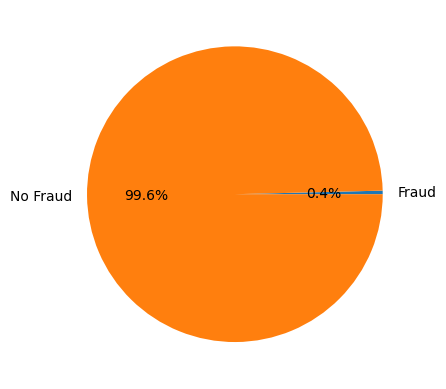

In [4]:
# Create data
labels = 'Fraud', 'No Fraud'
sizes = [cr_data_test['is_fraud'].value_counts()[1], cr_data_test['is_fraud'].value_counts()[0]]

# Plot data
plt.pie(sizes, labels=labels, autopct='%1.1f%%')
plt.show()

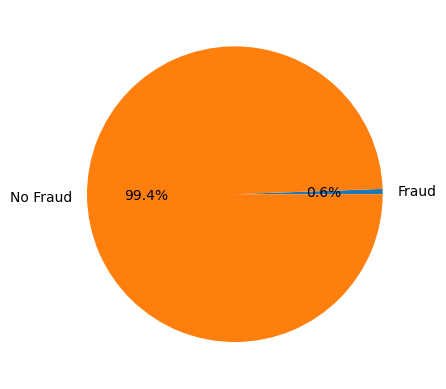

In [5]:
# Create data
labels = 'Fraud', 'No Fraud'
sizes = [cr_data_train['is_fraud'].value_counts()[1], cr_data_train['is_fraud'].value_counts()[0]]

# Plot data
plt.pie(sizes, labels=labels, autopct='%1.1f%%')
plt.show()

### Preprocessing and Analysis

In [6]:
print(cr_data_test.columns)

Index(['trans_date_trans_time', 'cc_num', 'merchant', 'category', 'amt',
       'first', 'last', 'gender', 'street', 'city', 'state', 'zip', 'lat',
       'long', 'city_pop', 'job', 'dob', 'trans_num', 'unix_time', 'merch_lat',
       'merch_long', 'is_fraud'],
      dtype='object')


In [7]:
from sklearn.preprocessing import StandardScaler,LabelEncoder

cr_data_test.drop(columns=['first','last','gender','lat','long','city_pop','street','city','state','job','zip','dob','merch_lat','merch_long'], inplace=True)
cr_data_train.drop(columns=['first','last','gender','lat','long','city_pop','city','street','state','job','dob','zip','merch_lat','merch_long'] ,inplace=True)


In [8]:
print(cr_data_test.isnull().sum())
print(cr_data_train.isnull().sum())

trans_date_trans_time    0
cc_num                   0
merchant                 0
category                 0
amt                      0
trans_num                0
unix_time                0
is_fraud                 0
dtype: int64
trans_date_trans_time    0
cc_num                   0
merchant                 0
category                 0
amt                      0
trans_num                0
unix_time                0
is_fraud                 0
dtype: int64


No missing data in the data set


In [9]:
cr_data_train.head()

,trans_date_trans_time,cc_num,merchant,category,amt,trans_num,unix_time,is_fraud
0,1/1/2019 0:00,2703190000000000,"fraud_Rippin, Kub and Mann",misc_net,4.97,0b242abb623afc578575680df30655b9,1325376018,0
1,1/1/2019 0:00,630423000000,"fraud_Heller, Gutmann and Zieme",grocery_pos,107.23,1f76529f8574734946361c461b024d99,1325376044,0
2,1/1/2019 0:00,38859500000000,fraud_Lind-Buckridge,entertainment,220.11,a1a22d70485983eac12b5b88dad1cf95,1325376051,0
3,1/1/2019 0:01,3534090000000000,"fraud_Kutch, Hermiston and Farrell",gas_transport,45.00,6b849c168bdad6f867558c3793159a81,1325376076,0
4,1/1/2019 0:03,375534000000000,fraud_Keeling-Crist,misc_pos,41.96,a41d7549acf90789359a9aa5346dcb46,1325376186,0


In [10]:

int_columns = ['cc_num', 'unix_time', 'is_fraud']
encode_columns = ['merchant', 'category']
scale_columns = ['amt', 'unix_time']


# Convert trans_date_trans_time to datetime
cr_data_train['trans_date_trans_time'] = pd.to_datetime(cr_data_train['trans_date_trans_time'])
cr_data_test['trans_date_trans_time'] = pd.to_datetime(cr_data_test['trans_date_trans_time'])


cr_data_train['hour'] = cr_data_train['trans_date_trans_time'].dt.hour
cr_data_train['day'] = cr_data_train['trans_date_trans_time'].dt.day
cr_data_train['month'] = cr_data_train['trans_date_trans_time'].dt.month
cr_data_train['year'] = cr_data_train['trans_date_trans_time'].dt.year

cr_data_test['hour'] = cr_data_test['trans_date_trans_time'].dt.hour
cr_data_test['day'] = cr_data_test['trans_date_trans_time'].dt.day
cr_data_test['month'] = cr_data_test['trans_date_trans_time'].dt.month
cr_data_test['year'] = cr_data_test['trans_date_trans_time'].dt.year

cr_data_train.drop(columns=['trans_date_trans_time','trans_num'], inplace=True)
cr_data_test.drop(columns=['trans_date_trans_time','trans_num'], inplace=True)

cr_data_train.drop


# Label encoding
for col in encode_columns:
    le = LabelEncoder()
    cr_data_train[col] = le.fit_transform(cr_data_train[col])
    cr_data_test[col] = le.transform(cr_data_test[col])

# Standard scaling
scaler = StandardScaler()
cr_data_train[scale_columns] = scaler.fit_transform(cr_data_train[scale_columns])
cr_data_test[scale_columns] = scaler.transform(cr_data_test[scale_columns])


In [11]:
#Splitting the dataset 
X_train = cr_data_train.drop(columns=['is_fraud'])
Y_train = cr_data_train['is_fraud']

X_test = cr_data_test.drop(columns=['is_fraud'])
Y_test = cr_data_test['is_fraud']

In [12]:
print(cr_data_train.dtypes)

cc_num         int64
merchant       int32
category       int32
amt          float64
unix_time    float64
is_fraud       int64
hour           int64
day            int64
month          int64
year           int64
dtype: object


In [13]:
cr_data_train.head()

,cc_num,merchant,category,amt,unix_time,is_fraud,hour,day,month,year
0,2703190000000000,514,8,-0.408305,-1.915252,0,0,1,1,2019
1,630423000000,241,4,0.231013,-1.915250,0,0,1,1,2019
2,38859500000000,390,0,0.936726,-1.915249,0,0,1,1,2019
3,3534090000000000,360,2,-0.158042,-1.915247,0,0,1,1,2019
4,375534000000000,297,9,-0.177048,-1.915236,0,0,1,1,2019


### Creating a Multi-Layer Perceptron Model architecture

In [18]:
import tensorflow as tf

#MLP model
fraud_model = tf.keras.models.Sequential([
    tf.keras.layers.Dense(6, activation='relu', input_shape=(9,)), # 9 input shape because we have 10 features in it
    tf.keras.layers.Dense(3, activation='relu'),
    tf.keras.layers.Dense(1, activation='sigmoid') # Sigmoid activation fuction at the output layer for binary classification
])



#### Model compilation to configure the model for training

In [19]:
# Compile the model
fraud_model.compile(optimizer='SGD', loss='MSE', metrics=['accuracy'])

In [20]:
print(cr_data_train.dtypes)

cc_num         int64
merchant       int32
category       int32
amt          float64
unix_time    float64
is_fraud       int64
hour           int64
day            int64
month          int64
year           int64
dtype: object


In [21]:
# Model training
trained_fraud_model = fraud_model.fit(X_train, Y_train, epochs=10, batch_size=32)

Epoch 1/10
32768/32768 [==============================] - 84s 3ms/step - loss: 0.0121 - accuracy: 0.9943
Epoch 2/10
32768/32768 [==============================] - 87s 3ms/step - loss: 0.0061 - accuracy: 0.9943
Epoch 3/10
32768/32768 [==============================] - 79s 2ms/step - loss: 0.0059 - accuracy: 0.9943
Epoch 4/10
32768/32768 [==============================] - 34s 1ms/step - loss: 0.0058 - accuracy: 0.9943
Epoch 5/10
32768/32768 [==============================] - 34s 1ms/step - loss: 0.0058 - accuracy: 0.9943
Epoch 6/10
32768/32768 [==============================] - 34s 1ms/step - loss: 0.0058 - accuracy: 0.9943
Epoch 7/10
32768/32768 [==============================] - 36s 1ms/step - loss: 0.0058 - accuracy: 0.9943
Epoch 8/10
32768/32768 [==============================] - 36s 1ms/step - loss: 0.0057 - accuracy: 0.9943
Epoch 9/10
32768/32768 [==============================] - 37s 1ms/step - loss: 0.0057 - accuracy: 0.9943
Epoch 10/10
32768/32768 [==============================

#### Testing the model Prediction performance

In [22]:
testing_predictions = fraud_model.predict(X_test)
testing_predictions_decisons = (testing_predictions > 0.5).astype("int32")

#### Model evaluation metrics

In [26]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, confusion_matrix, precision_recall_curve

accuracy = accuracy_score(Y_test, testing_predictions_decisons)
precision = precision_score(Y_test, testing_predictions_decisons)
recall = recall_score(Y_test, testing_predictions_decisons)
f1 = f1_score(Y_test, testing_predictions_decisons)
roc_auc = roc_auc_score(Y_test, testing_predictions_decisons)

print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1 Score:", f1)
print("ROC AUC Score:", roc_auc)

c:\Users\suhas\anaconda3\envs\DL_ENV\lib\site-packages\sklearn\metrics\_classification.py:1334: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Accuracy: 0.9961401355721147
Precision: 0.0
Recall: 0.0
F1 Score: 0.0
ROC AUC Score: 0.5


In [28]:
# Confusion matrix
conf_matrix = confusion_matrix(Y_test, testing_predictions_decisons)
print("Confusion Matrix:")
print(conf_matrix)

Confusion Matrix:
[[553574      0]
 [  2145      0]]


In [29]:
# Precision Recall Curve
precision, recall, thresholds = precision_recall_curve(Y_test, testing_predictions)

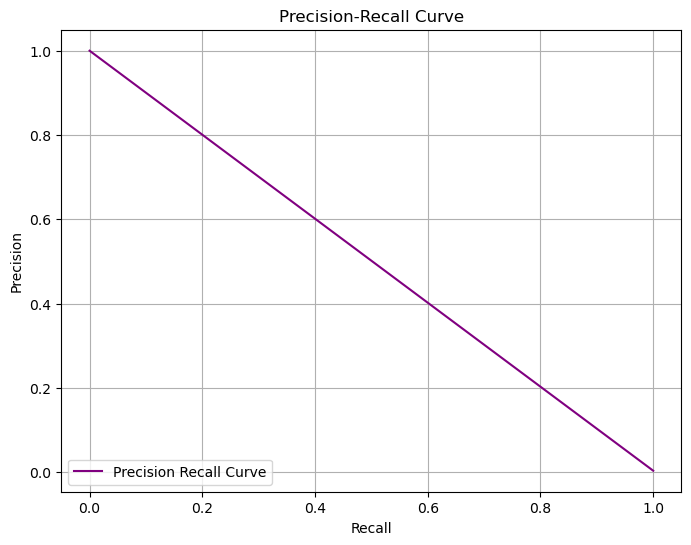

In [30]:
plt.figure(figsize=(8, 6))
plt.plot(recall, precision, color='purple', label='Precision Recall Curve')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve')
plt.legend(loc='lower left')
plt.grid(True)
plt.show()

### Perceptron with Mini Batch Gradient Descent Optimizer

#### Custom Optimizer

In [31]:
class MiniBatchSGD(tf.keras.optimizers.Optimizer):
    def __init__(self, learning_rate=0.01, momentum=0.9, name="MiniBatchSGD", **kwargs):
        super().__init__(name, **kwargs)
        self.learning_rate = learning_rate
        self.momentum = momentum

    def apply_gradients(self, grads_and_vars, name=None):
        for gradient, variable in grads_and_vars:
            momentum_variable = self.get_slot(variable, "momentum")
            velocity_variable = self.get_slot(variable, "velocity")
            # Compute the new momentum
            new_momentum = self.momentum * momentum_variable + (1 - self.momentum) * gradient
            update = self.learning_rate * new_momentum
            # Update the variable by subtracting the computed update
            variable.assign_sub(update)
            # Assigning the new variables
            momentum_variable.assign(new_momentum)
            velocity_variable.assign(update)

    def get_config(self):
        base_config = super().get_config()
        return {
            **base_config,
            "learning_rate": self.learning_rate,
            "momentum": self.momentum,
        }


In [32]:
# MLP model
sec_fraud_model = tf.keras.models.Sequential([
    tf.keras.layers.Dense(6, activation='relu', input_shape=(9,)), # 9 input shape because we have 10 features in it
    tf.keras.layers.Dense(3, activation='relu'),
    tf.keras.layers.Dense(1, activation='sigmoid') # Sigmoid activation fuction at the output layer for binary classification
])

# Compile the model with custom optimizer
mbgd = MiniBatchSGD(learning_rate=0.01, momentum=0.9)
sec_fraud_model.compile(optimizer=mbgd, loss='mse', metrics=['accuracy'])

# Train the model
fraud_model.fit(X_train, Y_train, epochs=10, batch_size=32)


Epoch 1/10
32768/32768 [==============================] - 48s 1ms/step - loss: 0.0057 - accuracy: 0.9943
Epoch 2/10
32768/32768 [==============================] - 50s 2ms/step - loss: 0.0057 - accuracy: 0.9943
Epoch 3/10
32768/32768 [==============================] - 83s 3ms/step - loss: 0.0057 - accuracy: 0.9943
Epoch 4/10
32768/32768 [==============================] - 67s 2ms/step - loss: 0.0057 - accuracy: 0.9943
Epoch 5/10
32768/32768 [==============================] - 65s 2ms/step - loss: 0.0057 - accuracy: 0.9943
Epoch 6/10
32768/32768 [==============================] - 72s 2ms/step - loss: 0.0057 - accuracy: 0.9943
Epoch 7/10
32768/32768 [==============================] - 66s 2ms/step - loss: 0.0057 - accuracy: 0.9943
Epoch 8/10
32768/32768 [==============================] - 69s 2ms/step - loss: 0.0057 - accuracy: 0.9943
Epoch 9/10
32768/32768 [==============================] - 67s 2ms/step - loss: 0.0057 - accuracy: 0.9943
Epoch 10/10
32768/32768 [==============================

In [33]:
testing_predictions2 = fraud_model.predict(X_test)
testing_predictions_decisons2 = (testing_predictions2 > 0.5).astype("int32")

In [34]:
accuracy = accuracy_score(Y_test, testing_predictions_decisons2)
precision = precision_score(Y_test, testing_predictions_decisons2)
recall = recall_score(Y_test, testing_predictions_decisons2)
f1 = f1_score(Y_test, testing_predictions_decisons2)
roc_auc = roc_auc_score(Y_test, testing_predictions_decisons2)

print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1 Score:", f1)
print("ROC AUC Score:", roc_auc)

c:\Users\suhas\anaconda3\envs\DL_ENV\lib\site-packages\sklearn\metrics\_classification.py:1334: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Accuracy: 0.9961401355721147
Precision: 0.0
Recall: 0.0
F1 Score: 0.0
ROC AUC Score: 0.5


In [35]:
# Confusion matrix
conf_matrix = confusion_matrix(Y_test, testing_predictions_decisons2)
print("Confusion Matrix:")
print(conf_matrix)

Confusion Matrix:
[[553574      0]
 [  2145      0]]
